# Import Library

Tahap ini melakukan import library yang dibutuhkan untuk:
1. **Manipulasi Data**: `pandas`, `numpy`
2. **Visualisasi Data**: `seaborn`, `matplotlib`
3. **Pemrosesan & Pemodelan**: `skleaitma Clustering, PCA, Random Forest, dan metrik evaluasi).

In [188]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Memuat Dataset

Membaca dataset dari file Excel (`Data Kabupaten Kota.xlsx`) dan menyimpannya ke dalam DataFrame `df`.

In [2]:
# Input Data
df  = pd.read_excel('Data Kabupaten Kota.xlsx')
df

,No,Kabupaten/Kota,Provinsi,Jumlah Penduduk Miskin (000),Persentase Penduduk Miskin,P1,P2,Garis Kemiskinan (Rp/kap/ bulan),Tamat Dibawah SD,Tamat SD/SMP,...,Tidak Bekerja,Bekerja di Sektor Informal,Bekerja di Sektor Formal,Bekerja di Sektor Pertanian,Bekerja Bukan di Sektor Pertanian,PKP Untuk Makanan Miskin,PKP Untuk Makanan Tidak Miskin,PKP Untuk Makanan Miskin dan Tidak Miskin,Air Layak,Jamban Sendiri/Bersama
0,1,Simeulue,Aceh,15.58,15.52,2.227,0.458,586505,2.55,67.44,...,43.03,49.18,7.79,46.18,10.78,65.74,59.94,60.37,86.55,63.78
1,2,Aceh Singkil,Aceh,22.51,17.07,3.237,0.913,619322,10.64,57.02,...,50.78,40.79,8.43,34.12,15.1,66.66,57.17,57.96,77.64,81.93
2,3,Aceh Selatan,Aceh,25.39,9.89,1.552,0.461,538174,6.77,54.92,...,56.57,35.77,7.66,19.85,23.58,63.25,65.28,65.20,92.72,92.45
3,4,Aceh Tenggara,Aceh,22.52,9.78,1.036,0.162,502074,NaN,47.42,...,38.20,49.16,12.64,37.3,24.5,62.33,62.09,62.10,83.55,77.79
4,5,Aceh Timur,Aceh,52.23,11.24,1.021,0.151,564943,NaN,64.76,...,55.81,25.48,18.71,25.6,18.6,65.98,60.37,60.67,82.67,89.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,Tolikara,Papua Pegunungan,45.62,28.75,2.695,0.385,861729,77.58,13.01,...,15.81,81.33,NaN,81.33,NaN,78.20,75.08,75.69,30.12,10.56
510,511,Mamberamo Tengah,Papua Pegunungan,18.81,32.20,7.042,2.094,901904,34.74,44.25,...,17.22,78.20,4.58,81.39,NaN,73.21,69.96,70.57,34.20,55.63
511,512,Yalimo,Papua Pegunungan,19.90,27.35,6.364,1.811,775882,NaN,49.77,...,24.65,62.36,12.99,75.35,–,75.10,63.90,65.42,59.43,96.45
512,513,Yahukimo,Papua Pegunungan,62.42,30.61,3.737,0.703,908562,57.7,38.19,...,10.99,88.13,NaN,87.97,1.04,73.99,64.83,66.46,29.45,20.97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No                                         514 non-null    int64  
 1   Kabupaten/Kota                             514 non-null    object 
 2   Provinsi                                   514 non-null    object 
 3   Jumlah Penduduk Miskin (000)               514 non-null    float64
 4   Persentase Penduduk Miskin                 514 non-null    float64
 5   P1                                         514 non-null    float64
 6   P2                                         514 non-null    float64
 7   Garis Kemiskinan (Rp/kap/ bulan)           514 non-null    int64  
 8   Tamat Dibawah SD                           428 non-null    object 
 9   Tamat SD/SMP                               514 non-null    float64
 10  Tamat SMA dan Seterusnya  

In [4]:
# Mengubah kolom menjadi huruf kecil semua
df.columns = df.columns.str.lower()
df

,no,kabupaten/kota,provinsi,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,...,tidak bekerja,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,pkp untuk makanan miskin dan tidak miskin,air layak,jamban sendiri/bersama
0,1,Simeulue,Aceh,15.58,15.52,2.227,0.458,586505,2.55,67.44,...,43.03,49.18,7.79,46.18,10.78,65.74,59.94,60.37,86.55,63.78
1,2,Aceh Singkil,Aceh,22.51,17.07,3.237,0.913,619322,10.64,57.02,...,50.78,40.79,8.43,34.12,15.1,66.66,57.17,57.96,77.64,81.93
2,3,Aceh Selatan,Aceh,25.39,9.89,1.552,0.461,538174,6.77,54.92,...,56.57,35.77,7.66,19.85,23.58,63.25,65.28,65.20,92.72,92.45
3,4,Aceh Tenggara,Aceh,22.52,9.78,1.036,0.162,502074,NaN,47.42,...,38.20,49.16,12.64,37.3,24.5,62.33,62.09,62.10,83.55,77.79
4,5,Aceh Timur,Aceh,52.23,11.24,1.021,0.151,564943,NaN,64.76,...,55.81,25.48,18.71,25.6,18.6,65.98,60.37,60.67,82.67,89.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,Tolikara,Papua Pegunungan,45.62,28.75,2.695,0.385,861729,77.58,13.01,...,15.81,81.33,NaN,81.33,NaN,78.20,75.08,75.69,30.12,10.56
510,511,Mamberamo Tengah,Papua Pegunungan,18.81,32.20,7.042,2.094,901904,34.74,44.25,...,17.22,78.20,4.58,81.39,NaN,73.21,69.96,70.57,34.20,55.63
511,512,Yalimo,Papua Pegunungan,19.90,27.35,6.364,1.811,775882,NaN,49.77,...,24.65,62.36,12.99,75.35,–,75.10,63.90,65.42,59.43,96.45
512,513,Yahukimo,Papua Pegunungan,62.42,30.61,3.737,0.703,908562,57.7,38.19,...,10.99,88.13,NaN,87.97,1.04,73.99,64.83,66.46,29.45,20.97


In [5]:
# Mengecek Data yang Kosong
df.isnull().sum()

no                                            0
kabupaten/kota                                0
provinsi                                      0
jumlah penduduk miskin (000)                  0
persentase penduduk miskin                    0
p1                                            0
p2                                            0
garis kemiskinan (rp/kap/ bulan)              0
tamat dibawah sd                             86
tamat sd/smp                                  0
tamat sma dan seterusnya                     17
angka partisipasi sekolah 7-12                0
angka partisipasi sekolah 13-15               6
tidak bekerja                                 1
bekerja di sektor informal                    3
bekerja di sektor formal                     38
bekerja di sektor pertanian                  49
bekerja bukan di sektor pertanian            20
pkp untuk makanan miskin                      0
pkp untuk makanan tidak miskin                0
pkp untuk makanan miskin dan tidak miski

# Data Cleaning (Pembersihan Data)

Menangani nilai-nilai yang hilang (*missing values*) yang terdeteksi pada tahap pemeriksaan informasi data sebelumnya.

In [6]:
# Cleaning Data
cols_to_numeric = df.drop(columns=['no', 'kabupaten/kota', 'provinsi']).columns
cols_to_numeric

Index(['jumlah penduduk miskin (000)', 'persentase penduduk miskin', 'p1',
       'p2', 'garis kemiskinan (rp/kap/ bulan)', 'tamat dibawah sd',
       'tamat sd/smp', 'tamat sma dan seterusnya',
       'angka partisipasi sekolah 7-12', 'angka partisipasi sekolah 13-15',
       'tidak bekerja', 'bekerja di sektor informal',
       'bekerja di sektor formal ', 'bekerja di sektor pertanian',
       'bekerja bukan di sektor pertanian', 'pkp untuk makanan miskin',
       'pkp untuk makanan tidak miskin',
       'pkp untuk makanan miskin dan tidak miskin', 'air layak',
       'jamban sendiri/bersama'],
      dtype='object')

In [7]:
# Mengisi Kolom yang kosong
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[cols_to_numeric] = df.groupby('provinsi')[cols_to_numeric].transform(lambda x: x.fillna(x.mean()))
df = df.fillna(df.mean(numeric_only=True))
df

,no,kabupaten/kota,provinsi,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,...,tidak bekerja,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,pkp untuk makanan miskin dan tidak miskin,air layak,jamban sendiri/bersama
0,1,Simeulue,Aceh,15.58,15.52,2.227,0.458,586505,2.550000,67.44,...,43.03,49.18,7.79,46.18,10.780,65.74,59.94,60.37,86.55,63.78
1,2,Aceh Singkil,Aceh,22.51,17.07,3.237,0.913,619322,10.640000,57.02,...,50.78,40.79,8.43,34.12,15.100,66.66,57.17,57.96,77.64,81.93
2,3,Aceh Selatan,Aceh,25.39,9.89,1.552,0.461,538174,6.770000,54.92,...,56.57,35.77,7.66,19.85,23.580,63.25,65.28,65.20,92.72,92.45
3,4,Aceh Tenggara,Aceh,22.52,9.78,1.036,0.162,502074,8.229286,47.42,...,38.20,49.16,12.64,37.30,24.500,62.33,62.09,62.10,83.55,77.79
4,5,Aceh Timur,Aceh,52.23,11.24,1.021,0.151,564943,8.229286,64.76,...,55.81,25.48,18.71,25.60,18.600,65.98,60.37,60.67,82.67,89.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,Tolikara,Papua Pegunungan,45.62,28.75,2.695,0.385,861729,77.580000,13.01,...,15.81,81.33,12.28,81.33,2.455,78.20,75.08,75.69,30.12,10.56
510,511,Mamberamo Tengah,Papua Pegunungan,18.81,32.20,7.042,2.094,901904,34.740000,44.25,...,17.22,78.20,4.58,81.39,2.455,73.21,69.96,70.57,34.20,55.63
511,512,Yalimo,Papua Pegunungan,19.90,27.35,6.364,1.811,775882,59.425714,49.77,...,24.65,62.36,12.99,75.35,2.455,75.10,63.90,65.42,59.43,96.45
512,513,Yahukimo,Papua Pegunungan,62.42,30.61,3.737,0.703,908562,57.700000,38.19,...,10.99,88.13,12.28,87.97,1.040,73.99,64.83,66.46,29.45,20.97


In [8]:
df.isnull().sum()

no                                           0
kabupaten/kota                               0
provinsi                                     0
jumlah penduduk miskin (000)                 0
persentase penduduk miskin                   0
p1                                           0
p2                                           0
garis kemiskinan (rp/kap/ bulan)             0
tamat dibawah sd                             0
tamat sd/smp                                 0
tamat sma dan seterusnya                     0
angka partisipasi sekolah 7-12               0
angka partisipasi sekolah 13-15              0
tidak bekerja                                0
bekerja di sektor informal                   0
bekerja di sektor formal                     0
bekerja di sektor pertanian                  0
bekerja bukan di sektor pertanian            0
pkp untuk makanan miskin                     0
pkp untuk makanan tidak miskin               0
pkp untuk makanan miskin dan tidak miskin    0
air layak    

In [9]:
df['jumlah penduduk miskin (000)'] = (df['jumlah penduduk miskin (000)'] * 1000).astype(int)
df

,no,kabupaten/kota,provinsi,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,...,tidak bekerja,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,pkp untuk makanan miskin dan tidak miskin,air layak,jamban sendiri/bersama
0,1,Simeulue,Aceh,15580,15.52,2.227,0.458,586505,2.550000,67.44,...,43.03,49.18,7.79,46.18,10.780,65.74,59.94,60.37,86.55,63.78
1,2,Aceh Singkil,Aceh,22510,17.07,3.237,0.913,619322,10.640000,57.02,...,50.78,40.79,8.43,34.12,15.100,66.66,57.17,57.96,77.64,81.93
2,3,Aceh Selatan,Aceh,25390,9.89,1.552,0.461,538174,6.770000,54.92,...,56.57,35.77,7.66,19.85,23.580,63.25,65.28,65.20,92.72,92.45
3,4,Aceh Tenggara,Aceh,22520,9.78,1.036,0.162,502074,8.229286,47.42,...,38.20,49.16,12.64,37.30,24.500,62.33,62.09,62.10,83.55,77.79
4,5,Aceh Timur,Aceh,52230,11.24,1.021,0.151,564943,8.229286,64.76,...,55.81,25.48,18.71,25.60,18.600,65.98,60.37,60.67,82.67,89.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,Tolikara,Papua Pegunungan,45620,28.75,2.695,0.385,861729,77.580000,13.01,...,15.81,81.33,12.28,81.33,2.455,78.20,75.08,75.69,30.12,10.56
510,511,Mamberamo Tengah,Papua Pegunungan,18810,32.20,7.042,2.094,901904,34.740000,44.25,...,17.22,78.20,4.58,81.39,2.455,73.21,69.96,70.57,34.20,55.63
511,512,Yalimo,Papua Pegunungan,19900,27.35,6.364,1.811,775882,59.425714,49.77,...,24.65,62.36,12.99,75.35,2.455,75.10,63.90,65.42,59.43,96.45
512,513,Yahukimo,Papua Pegunungan,62420,30.61,3.737,0.703,908562,57.700000,38.19,...,10.99,88.13,12.28,87.97,1.040,73.99,64.83,66.46,29.45,20.97


# Exploratory Data Analysis (EDA)
Menganalisis data antara variabel sebelum dilakukan analisis lanjutan

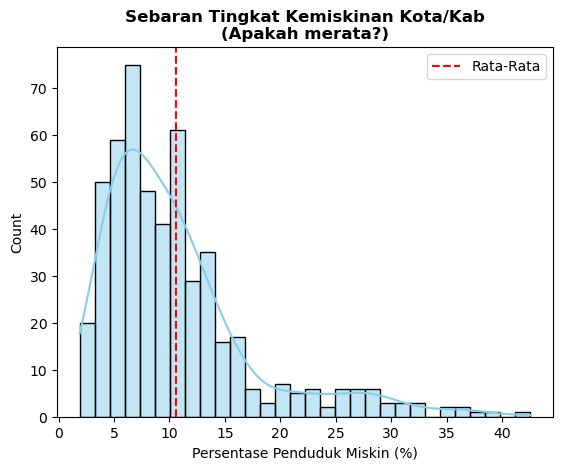

In [73]:
# EDA 
# Histogram 
plt.subplot(1, 1, 1)
sns.histplot(df['persentase penduduk miskin'], kde=True, color='skyblue', bins=30)
plt.axvline(df['persentase penduduk miskin'].mean(), color='red', linestyle='--', label='Rata-Rata')
plt.title('Sebaran Tingkat Kemiskinan Kota/Kab\n(Apakah merata?)', fontsize=12, fontweight='bold')
plt.xlabel('Persentase Penduduk Miskin (%)')
plt.legend()

Text(0.5, 0, '% Lulusan SMA')

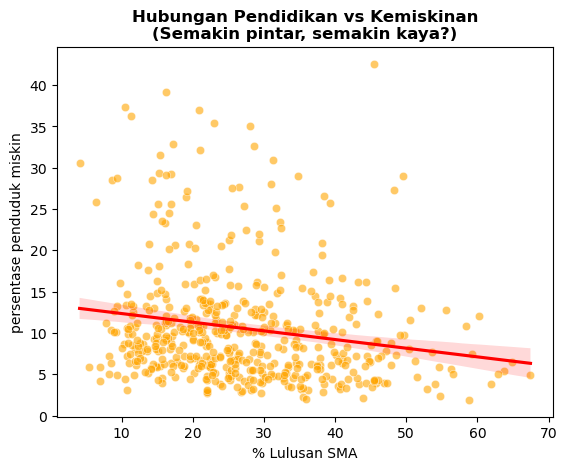

In [77]:
# SCATTER (Pendidikan vs Miskin)
plt.subplot(1, 1, 1)
sns.scatterplot(x='tamat sma dan seterusnya', y='persentase penduduk miskin', data=df, alpha=0.6, color='orange')
sns.regplot(x='tamat sma dan seterusnya', y='persentase penduduk miskin', data=df, scatter=False, color='red')
plt.title('Hubungan Pendidikan vs Kemiskinan\n(Semakin pintar, semakin kaya?)', fontsize=12, fontweight='bold')
plt.xlabel('% Lulusan SMA')

Text(0.5, 0, '% Akses Jamban Layak')

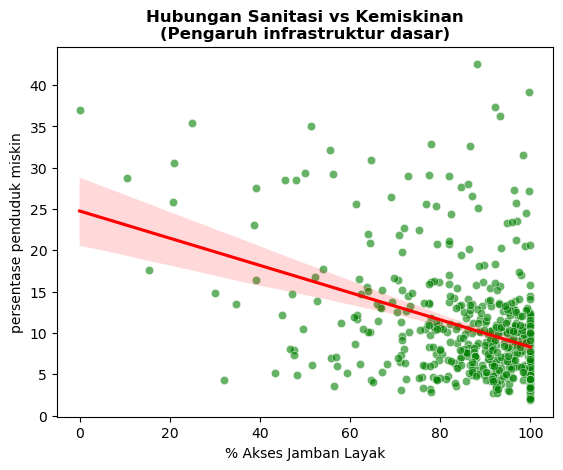

In [81]:
# SCATTER (Sanitasi vs Miskin)
plt.subplot(1, 1, 1) 
sns.scatterplot(x='jamban sendiri/bersama', y='persentase penduduk miskin', data=df, alpha=0.6, color='green')
sns.regplot(x='jamban sendiri/bersama', y='persentase penduduk miskin', data=df, scatter=False, color='red')
plt.title('Hubungan Sanitasi vs Kemiskinan\n(Pengaruh infrastruktur dasar)', fontsize=12, fontweight='bold')
plt.xlabel('% Akses Jamban Layak')

Text(0.5, 0, '% Jumlah Pengangguran')

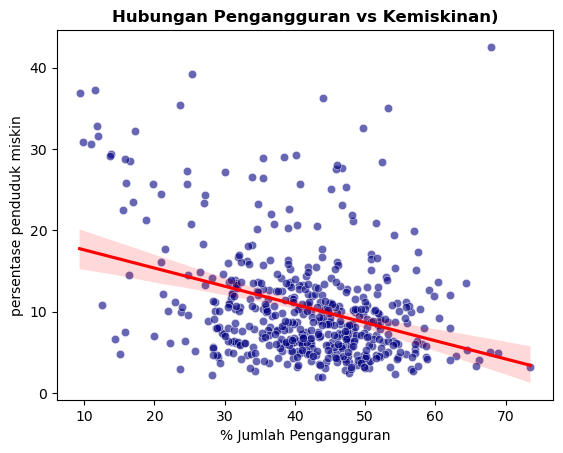

In [99]:
# SCATTER (Tidak Bekerja vs Miskin)
plt.subplot(1, 1, 1)
sns.scatterplot(x='tidak bekerja', y='persentase penduduk miskin', data=df, alpha=0.6, color='navy')
sns.regplot(x='tidak bekerja', y='persentase penduduk miskin', data=df, scatter=False, color='red')
plt.title('Hubungan Pengangguran vs Kemiskinan)', fontsize=12, fontweight='bold')
plt.xlabel('% Jumlah Pengangguran')

In [117]:
kondisi = (df['tidak bekerja'] >= 70) & (df['persentase penduduk miskin'] <= 10)
df_terpilih = df[kondisi]
df_terpilih[['kabupaten/kota', 'provinsi', 'tidak bekerja', 'persentase penduduk miskin', 'bekerja di sektor pertanian', 'bekerja bukan di sektor pertanian']]

,kabupaten/kota,provinsi,tidak bekerja,persentase penduduk miskin,bekerja di sektor pertanian,bekerja bukan di sektor pertanian
97,Kota Sungai Penuh,Jambi,73.55,3.23,32.915,26.45


# Uji Multikolinieritas 
Dilakukan uji ini untuk mengecek antar variabel yang hubungannya tinggi

In [10]:
# Mengecek Multikolinierietas
df_for_multikol = df.drop(columns=['no', 'kabupaten/kota', 'provinsi'])
df_for_multikol

,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,tamat sma dan seterusnya,angka partisipasi sekolah 7-12,angka partisipasi sekolah 13-15,tidak bekerja,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,pkp untuk makanan miskin dan tidak miskin,air layak,jamban sendiri/bersama
0,15580,15.52,2.227,0.458,586505,2.550000,67.44,30.01,97.52,100.00,43.03,49.18,7.79,46.18,10.780,65.74,59.94,60.37,86.55,63.78
1,22510,17.07,3.237,0.913,619322,10.640000,57.02,32.34,100.00,85.36,50.78,40.79,8.43,34.12,15.100,66.66,57.17,57.96,77.64,81.93
2,25390,9.89,1.552,0.461,538174,6.770000,54.92,38.30,100.00,100.00,56.57,35.77,7.66,19.85,23.580,63.25,65.28,65.20,92.72,92.45
3,22520,9.78,1.036,0.162,502074,8.229286,47.42,49.69,94.75,100.00,38.20,49.16,12.64,37.30,24.500,62.33,62.09,62.10,83.55,77.79
4,52230,11.24,1.021,0.151,564943,8.229286,64.76,31.53,96.80,86.17,55.81,25.48,18.71,25.60,18.600,65.98,60.37,60.67,82.67,89.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,45620,28.75,2.695,0.385,861729,77.580000,13.01,9.41,53.87,55.06,15.81,81.33,12.28,81.33,2.455,78.20,75.08,75.69,30.12,10.56
510,18810,32.20,7.042,2.094,901904,34.740000,44.25,21.01,87.13,50.01,17.22,78.20,4.58,81.39,2.455,73.21,69.96,70.57,34.20,55.63
511,19900,27.35,6.364,1.811,775882,59.425714,49.77,48.31,85.32,96.60,24.65,62.36,12.99,75.35,2.455,75.10,63.90,65.42,59.43,96.45
512,62420,30.61,3.737,0.703,908562,57.700000,38.19,4.11,65.30,53.80,10.99,88.13,12.28,87.97,1.040,73.99,64.83,66.46,29.45,20.97


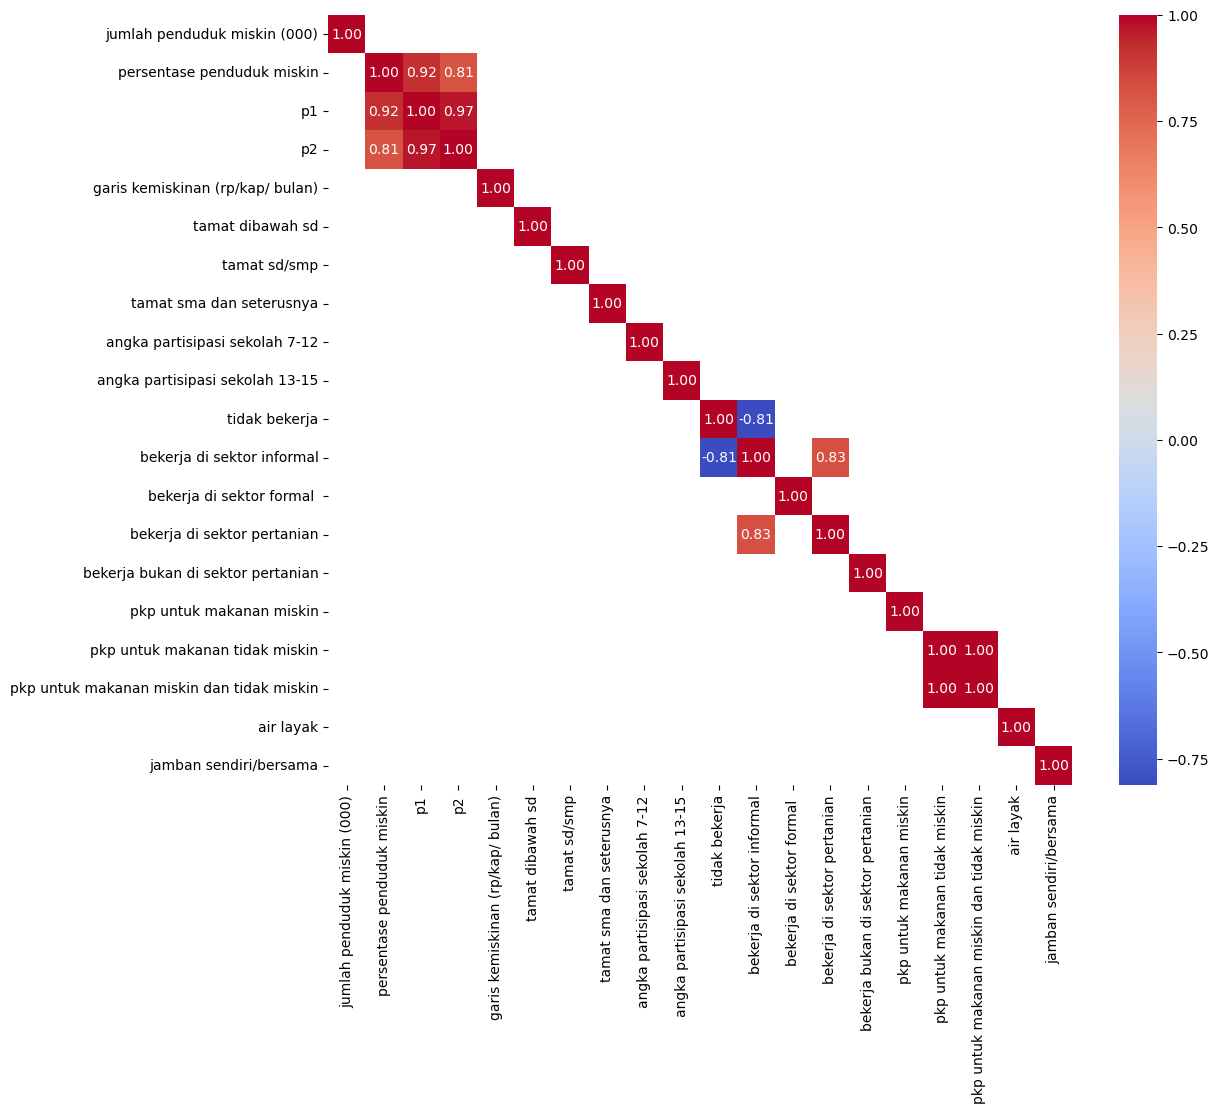

In [11]:
corr = df_for_multikol.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=corr.abs() < 0.8 , cmap='coolwarm', fmt=".2f", annot=True)
plt.show()

In [12]:
# Menghapus kolom yang tidak penting 
df_for_multikol.drop(columns=['pkp untuk makanan miskin dan tidak miskin'], inplace=True)
df_for_multikol

,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,tamat sma dan seterusnya,angka partisipasi sekolah 7-12,angka partisipasi sekolah 13-15,tidak bekerja,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,air layak,jamban sendiri/bersama
0,15580,15.52,2.227,0.458,586505,2.550000,67.44,30.01,97.52,100.00,43.03,49.18,7.79,46.18,10.780,65.74,59.94,86.55,63.78
1,22510,17.07,3.237,0.913,619322,10.640000,57.02,32.34,100.00,85.36,50.78,40.79,8.43,34.12,15.100,66.66,57.17,77.64,81.93
2,25390,9.89,1.552,0.461,538174,6.770000,54.92,38.30,100.00,100.00,56.57,35.77,7.66,19.85,23.580,63.25,65.28,92.72,92.45
3,22520,9.78,1.036,0.162,502074,8.229286,47.42,49.69,94.75,100.00,38.20,49.16,12.64,37.30,24.500,62.33,62.09,83.55,77.79
4,52230,11.24,1.021,0.151,564943,8.229286,64.76,31.53,96.80,86.17,55.81,25.48,18.71,25.60,18.600,65.98,60.37,82.67,89.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,45620,28.75,2.695,0.385,861729,77.580000,13.01,9.41,53.87,55.06,15.81,81.33,12.28,81.33,2.455,78.20,75.08,30.12,10.56
510,18810,32.20,7.042,2.094,901904,34.740000,44.25,21.01,87.13,50.01,17.22,78.20,4.58,81.39,2.455,73.21,69.96,34.20,55.63
511,19900,27.35,6.364,1.811,775882,59.425714,49.77,48.31,85.32,96.60,24.65,62.36,12.99,75.35,2.455,75.10,63.90,59.43,96.45
512,62420,30.61,3.737,0.703,908562,57.700000,38.19,4.11,65.30,53.80,10.99,88.13,12.28,87.97,1.040,73.99,64.83,29.45,20.97


# Data Preprocessing

Melakukan standarisasi fitur menggunakan `StandardScaler` agar skala data seragam, dan/atau mereduksi dimensi data menggunakan `PCA` (Principal Component Analysian.

In [13]:
# Standar Scaler agar data menjadi skala yang sama 
scaler = StandardScaler()
df_for_multikol[df_for_multikol.columns] = scaler.fit_transform(df_for_multikol)
df_for_multikol

,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,tamat sma dan seterusnya,angka partisipasi sekolah 7-12,angka partisipasi sekolah 13-15,tidak bekerja,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,air layak,jamban sendiri/bersama
0,-0.602064,0.714927,0.420543,0.128966,-0.023145,-1.744528,1.263579,0.250522,-0.061765,0.686025,0.151747,0.521914,-1.246890,0.732880,-1.338797,0.433665,1.197332,0.093467,-1.412355
1,-0.466733,0.938879,1.100220,1.053759,0.214774,-1.029820,0.318516,0.444265,0.371358,-0.558803,0.873976,-0.004656,-1.174340,0.009350,-1.022208,0.613316,0.744320,-0.419081,-0.269286
2,-0.410491,-0.098522,-0.033697,0.135063,-0.373539,-1.371714,0.128052,0.939847,0.371358,0.686025,1.413552,-0.319719,-1.261627,-0.846767,-0.400754,-0.052564,2.070647,0.448396,0.393254
3,-0.466538,-0.114416,-0.380938,-0.472658,-0.635259,-1.242793,-0.552176,1.886941,-0.545535,0.686025,-0.298366,0.520659,-0.697095,0.200132,-0.333333,-0.232215,1.548948,-0.079108,-0.530019
4,0.113649,0.096532,-0.391033,-0.495016,-0.179467,-1.242793,1.020511,0.376912,-0.187510,-0.489930,1.342727,-0.965537,-0.009000,-0.501801,-0.765712,0.480530,1.267655,-0.129730,0.232027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,-0.015434,2.626462,0.735482,-0.019408,1.972195,4.883974,-3.673061,-1.462396,-7.685076,-3.135189,-2.384911,2.539702,-0.737904,2.841676,-1.948892,2.866763,3.673360,-3.152671,-4.764098
510,-0.538988,3.124935,3.660788,3.454158,2.263459,1.099288,-0.839685,-0.497840,-1.876340,-3.564586,-2.253512,2.343258,-1.610775,2.845276,-1.948892,1.892352,2.836024,-2.917969,-1.925634
511,-0.517702,2.424183,3.204529,2.878957,1.349815,3.280140,-0.339038,1.772193,-2.192450,0.396925,-1.561103,1.349113,-0.657419,2.482911,-1.948892,2.261417,1.844959,-1.466612,0.645170
512,0.312642,2.895204,1.436694,0.626932,2.311728,3.127682,-1.389309,-1.903098,-5.688869,-3.242326,-2.834092,2.966481,-0.737904,3.240038,-2.052589,2.044665,1.997053,-3.191213,-4.108486


In [14]:
# Melakukan PCA untuk P0, P1, dan P2 
poverty_features = df_for_multikol[['jumlah penduduk miskin (000)', 'p1', 'p2']]
poverty_features

,jumlah penduduk miskin (000),p1,p2
0,-0.602064,0.420543,0.128966
1,-0.466733,1.100220,1.053759
2,-0.410491,-0.033697,0.135063
3,-0.466538,-0.380938,-0.472658
4,0.113649,-0.391033,-0.495016
...,...,...,...
509,-0.015434,0.735482,-0.019408
510,-0.538988,3.660788,3.454158
511,-0.517702,3.204529,2.878957
512,0.312642,1.436694,0.626932


In [15]:
pca = PCA(n_components=1)
poverty_pca = pca.fit_transform(poverty_features)
df_for_multikol['indeks kemiskinan gabungan'] = poverty_pca
df_for_multikol.drop(columns=['persentase penduduk miskin', 'p1', 'p2', 'jumlah penduduk miskin (000)'], inplace=True)
df_for_multikol

,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,tamat sma dan seterusnya,angka partisipasi sekolah 7-12,angka partisipasi sekolah 13-15,tidak bekerja,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,air layak,jamban sendiri/bersama,indeks kemiskinan gabungan
0,-0.023145,-1.744528,1.263579,0.250522,-0.061765,0.686025,0.151747,0.521914,-1.246890,0.732880,-1.338797,0.433665,1.197332,0.093467,-1.412355,0.381135
1,0.214774,-1.029820,0.318516,0.444265,0.371358,-0.558803,0.873976,-0.004656,-1.174340,0.009350,-1.022208,0.613316,0.744320,-0.419081,-0.269286,1.517234
2,-0.373539,-1.371714,0.128052,0.939847,0.371358,0.686025,1.413552,-0.319719,-1.261627,-0.846767,-0.400754,-0.052564,2.070647,0.448396,0.393254,0.066608
3,-0.635259,-1.242793,-0.552176,1.886941,-0.545535,0.686025,-0.298366,0.520659,-0.697095,0.200132,-0.333333,-0.232215,1.548948,-0.079108,-0.530019,-0.609277
4,-0.179467,-1.242793,1.020511,0.376912,-0.187510,-0.489930,1.342727,-0.965537,-0.009000,-0.501801,-0.765712,0.480530,1.267655,-0.129730,0.232027,-0.625079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1.972195,4.883974,-3.673061,-1.462396,-7.685076,-3.135189,-2.384911,2.539702,-0.737904,2.841676,-1.948892,2.866763,3.673360,-3.152671,-4.764098,0.506154
510,2.263459,1.099288,-0.839685,-0.497840,-1.876340,-3.564586,-2.253512,2.343258,-1.610775,2.845276,-1.948892,1.892352,2.836024,-2.917969,-1.925634,5.024020
511,1.349815,3.280140,-0.339038,1.772193,-2.192450,0.396925,-1.561103,1.349113,-0.657419,2.482911,-1.948892,2.261417,1.844959,-1.466612,0.645170,4.294991
512,2.311728,3.127682,-1.389309,-1.903098,-5.688869,-3.242326,-2.834092,2.966481,-0.737904,3.240038,-2.052589,2.044665,1.997053,-3.191213,-4.108486,1.462986


In [16]:
# Cek mean dan std dev
print(df_for_multikol.mean().round(2))
print(df_for_multikol.std().round(2))

garis kemiskinan (rp/kap/ bulan)    -0.0
tamat dibawah sd                    -0.0
tamat sd/smp                        -0.0
tamat sma dan seterusnya             0.0
angka partisipasi sekolah 7-12      -0.0
angka partisipasi sekolah 13-15      0.0
tidak bekerja                       -0.0
bekerja di sektor informal          -0.0
bekerja di sektor formal             0.0
bekerja di sektor pertanian          0.0
bekerja bukan di sektor pertanian    0.0
pkp untuk makanan miskin            -0.0
pkp untuk makanan tidak miskin      -0.0
air layak                            0.0
jamban sendiri/bersama               0.0
indeks kemiskinan gabungan           0.0
dtype: float64
garis kemiskinan (rp/kap/ bulan)     1.0
tamat dibawah sd                     1.0
tamat sd/smp                         1.0
tamat sma dan seterusnya             1.0
angka partisipasi sekolah 7-12       1.0
angka partisipasi sekolah 13-15      1.0
tidak bekerja                        1.0
bekerja di sektor informal           1.0
b

In [17]:
variance_captured = pca.explained_variance_ratio_[0] * 100
print(f"Indeks baru ini mewakili {variance_captured:.2f}% informasi dari 3 variabel asli.")

Indeks baru ini mewakili 65.66% informasi dari 3 variabel asli.


# Analisis Klaster 
Menganalisis kemiskinan dan membagi klaster Kabupaten/Kota yang memiliki kemiripan karakteristik. 

In [18]:
# Membuat Dataset Untuk di Klaster 
df_klaster = df['no']
df_klaster = pd.concat([df_klaster, df_for_multikol], axis=1)
df_klaster.rename(columns={
    'no': 'k'
}, inplace=True)
df_klaster

,k,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,tamat sma dan seterusnya,angka partisipasi sekolah 7-12,angka partisipasi sekolah 13-15,tidak bekerja,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,air layak,jamban sendiri/bersama,indeks kemiskinan gabungan
0,1,-0.023145,-1.744528,1.263579,0.250522,-0.061765,0.686025,0.151747,0.521914,-1.246890,0.732880,-1.338797,0.433665,1.197332,0.093467,-1.412355,0.381135
1,2,0.214774,-1.029820,0.318516,0.444265,0.371358,-0.558803,0.873976,-0.004656,-1.174340,0.009350,-1.022208,0.613316,0.744320,-0.419081,-0.269286,1.517234
2,3,-0.373539,-1.371714,0.128052,0.939847,0.371358,0.686025,1.413552,-0.319719,-1.261627,-0.846767,-0.400754,-0.052564,2.070647,0.448396,0.393254,0.066608
3,4,-0.635259,-1.242793,-0.552176,1.886941,-0.545535,0.686025,-0.298366,0.520659,-0.697095,0.200132,-0.333333,-0.232215,1.548948,-0.079108,-0.530019,-0.609277
4,5,-0.179467,-1.242793,1.020511,0.376912,-0.187510,-0.489930,1.342727,-0.965537,-0.009000,-0.501801,-0.765712,0.480530,1.267655,-0.129730,0.232027,-0.625079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,1.972195,4.883974,-3.673061,-1.462396,-7.685076,-3.135189,-2.384911,2.539702,-0.737904,2.841676,-1.948892,2.866763,3.673360,-3.152671,-4.764098,0.506154
510,511,2.263459,1.099288,-0.839685,-0.497840,-1.876340,-3.564586,-2.253512,2.343258,-1.610775,2.845276,-1.948892,1.892352,2.836024,-2.917969,-1.925634,5.024020
511,512,1.349815,3.280140,-0.339038,1.772193,-2.192450,0.396925,-1.561103,1.349113,-0.657419,2.482911,-1.948892,2.261417,1.844959,-1.466612,0.645170,4.294991
512,513,2.311728,3.127682,-1.389309,-1.903098,-5.688869,-3.242326,-2.834092,2.966481,-0.737904,3.240038,-2.052589,2.044665,1.997053,-3.191213,-4.108486,1.462986


In [19]:
# Menentukan jumlah klaster terbaik menggunakan silhouette index 
SK = range(2,6)
sil_score = []
for i in SK:
    labels = cluster.KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_klaster).labels_
    score = metrics.silhouette_score(df_klaster, labels, metric='euclidean')
    sil_score.append(score)

In [20]:
sil_value = pd.DataFrame({
    'Clusters': SK,
    'Silhouette Score': sil_score
})
sil_value

,Clusters,Silhouette Score
0,2,0.623806
1,3,0.584815
2,4,0.563692
3,5,0.549410


<Axes: xlabel='Clusters', ylabel='Silhouette Score'>

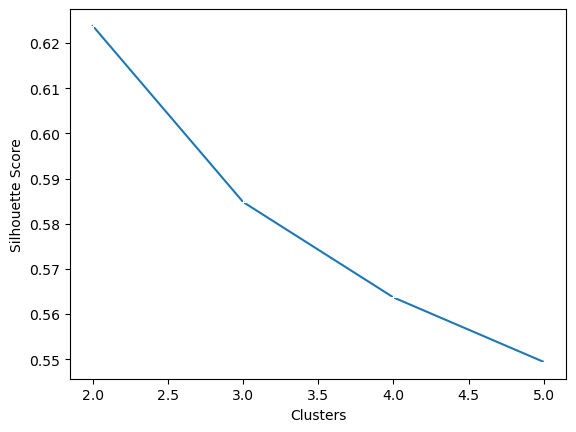

In [323]:
sns.lineplot(x = 'Clusters', y = 'Silhouette Score', data = sil_value, marker = '+')

In [21]:
# Validasi Klaster Menggunakan Elbow Method 
K = range(1, 6)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, init='k-means++')
    kmeans = kmeans.fit(df_klaster)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [22]:
centers_wss = pd.DataFrame({
    'Clusters' : K,
    'WSS' : wss
})
centers_wss

,Clusters,WSS
0,1,1.132508e+07
1,2,2.837552e+06
2,3,1.265728e+06
3,4,7.156286e+05
4,5,4.608618e+05


<Axes: xlabel='Clusters', ylabel='WSS'>

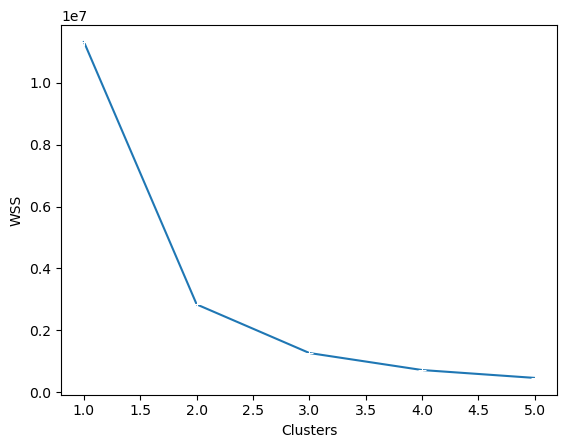

In [23]:
sns.lineplot(x = 'Clusters', y = 'WSS', data = centers_wss, marker="+")

In [24]:
# Pembentukan 2 klaster adalah yang terbaik. Tapi ambil pembentukan 3 klaster untuk melihat kab/kota mana yang menjadi priotitas khusus dalam mengatasi kemiskinan 
kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit(df_klaster)
y_kmeans

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [25]:
df_klaster['clusters'] = kmeans.labels_

In [26]:
df_klaster['clusters'].value_counts()

clusters
1    172
2    172
0    170
Name: count, dtype: int64

In [27]:
clusters_1 = df_klaster[df_klaster['clusters'] == 0].mean()
clusters_2 = df_klaster[df_klaster['clusters'] == 1].mean()
clusters_3 = df_klaster[df_klaster['clusters'] == 2].mean()
df_clus_avg = pd.concat([clusters_1, clusters_2, clusters_3], axis=1)
df_clus_avg

,0,1,2
k,429.500000,86.500000,258.500000
garis kemiskinan (rp/kap/ bulan),0.151009,0.087316,-0.236569
tamat dibawah sd,0.172569,-0.279244,0.108682
tamat sd/smp,-0.141323,-0.004887,0.144568
tamat sma dan seterusnya,-0.044942,0.293798,-0.249378
angka partisipasi sekolah 7-12,-0.424731,0.241053,0.178739
angka partisipasi sekolah 13-15,-0.289327,0.076514,0.209448
tidak bekerja,0.096561,0.084201,-0.179639
bekerja di sektor informal,0.176005,-0.131442,-0.042517
bekerja di sektor formal,-0.381927,0.144444,0.233042


In [32]:
df['clusters'] = kmeans.labels_

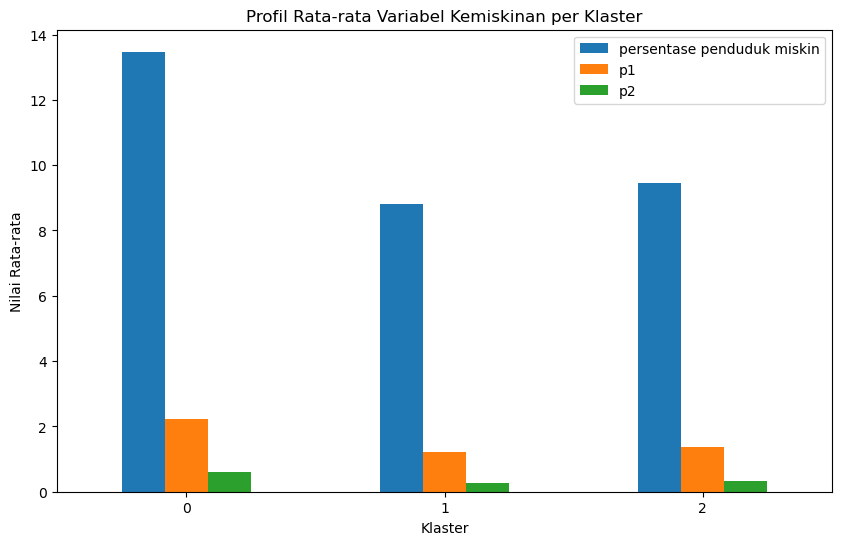

In [38]:
# Hitung rata-rata per klaster
cluster_profile = df.groupby('clusters')[['persentase penduduk miskin', 'p1', 'p2']].mean()

# Plotting
cluster_profile.plot(kind='bar', figsize=(10, 6))
plt.title('Profil Rata-rata Variabel Kemiskinan per Klaster')
plt.ylabel('Nilai Rata-rata')
plt.xlabel('Klaster')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   no                                         514 non-null    int64  
 1   kabupaten/kota                             514 non-null    object 
 2   provinsi                                   514 non-null    object 
 3   jumlah penduduk miskin (000)               514 non-null    int32  
 4   persentase penduduk miskin                 514 non-null    float64
 5   p1                                         514 non-null    float64
 6   p2                                         514 non-null    float64
 7   garis kemiskinan (rp/kap/ bulan)           514 non-null    int64  
 8   tamat dibawah sd                           514 non-null    float64
 9   tamat sd/smp                               514 non-null    float64
 10  tamat sma dan seterusnya  

In [46]:
sebaran_klaster = {}

for i in range(3): 
    wilayah = df[df['clusters'] == i]['kabupaten/kota'].tolist()
    sebaran_klaster[f'Klaster_{i}'] = wilayah
    print(f"Klaster {i} berisi {len(wilayah)} Kabupaten/Kota.")


Klaster 0 berisi 170 Kabupaten/Kota.
Klaster 1 berisi 172 Kabupaten/Kota.
Klaster 2 berisi 172 Kabupaten/Kota.


In [333]:
sebaran_klaster['Klaster_2']

['Subang',
 'Purwakarta',
 'Karawang',
 'Bekasi',
 'Bandung Barat',
 'Pangandaran',
 'Kota Bogor',
 'Kota Sukabumi',
 'Kota Bandung',
 'Kota Cirebon',
 'Kota Bekasi',
 'Kota Depok',
 'Kota Cimahi',
 'Kota Tasikmalaya',
 'Kota Banjar',
 'Cilacap',
 'Banyumas',
 'Purbalingga',
 'Banjarnegara',
 'Kebumen',
 'Purworejo',
 'Wonosobo',
 'Magelang',
 'Boyolali',
 'Klaten',
 'Sukoharjo',
 'Wonogiri',
 'Karanganyar',
 'Sragen',
 'Grobogan',
 'Blora',
 'Rembang',
 'Pati',
 'Kudus',
 'Jepara',
 'Demak',
 'Semarang',
 'Temanggung',
 'Kendal',
 'Batang',
 'Pekalongan',
 'Pemalang',
 'Tegal',
 'Brebes',
 'Kota Magelang',
 'Kota Surakarta',
 'Kota Salatiga',
 'Kota Semarang',
 'Kota Pekalongan',
 'Kota Tegal',
 'Kulon Progo',
 'Bantul',
 'Gunungkidul',
 'Sleman',
 'Kota Yogyakarta',
 'Pacitan',
 'Ponorogo',
 'Trenggalek',
 'Tulungagung',
 'Blitar',
 'Kediri',
 'Malang',
 'Lumajang',
 'Jember',
 'Banyuwangi',
 'Bondowoso',
 'Situbondo',
 'Probolinggo',
 'Pasuruan',
 'Sidoarjo',
 'Mojokerto',
 'Jombang

In [61]:
df[df['clusters'] == 2]

,no,kabupaten/kota,provinsi,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,...,bekerja di sektor informal,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,pkp untuk makanan miskin dan tidak miskin,air layak,jamban sendiri/bersama,clusters
172,173,Subang,Jawa Barat,148990,9.23,1.417,0.361,449186,12.360,67.64,...,23.54,20.840000,12.090,32.290000,63.85,55.13,55.44,100.00,100.00,2
173,174,Purwakarta,Jawa Barat,76510,7.87,0.974,0.183,483968,20.570,65.91,...,36.23,23.080000,13.260,46.040000,67.26,51.20,51.63,92.24,89.83,2
174,175,Karawang,Jawa Barat,169800,7.08,1.123,0.293,617901,21.290,61.09,...,20.69,30.610000,12.880,38.420000,60.78,51.50,51.69,86.85,84.66,2
175,176,Bekasi,Jawa Barat,191000,4.36,0.443,0.091,698154,12.740,41.65,...,20.26,27.650000,11.230,36.680000,64.02,46.94,47.15,100.00,98.34,2
176,177,Bandung Barat,Jawa Barat,169660,9.87,1.309,0.302,471101,11.580,73.50,...,25.69,28.330000,19.410,34.610000,64.70,52.32,52.74,93.99,90.51,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,340,Barito Timur,Kalimantan Tengah,8119,6.10,1.162,0.323,690677,15.020,66.57,...,57.68,9.410000,51.840,15.260000,62.09,50.50,50.75,59.32,84.63,2
340,341,Murung Raya,Kalimantan Tengah,7640,6.19,1.156,0.338,673423,25.610,51.79,...,19.13,26.460000,14.760,30.830000,59.05,56.60,56.66,55.27,78.60,2
341,342,Kota Palangka Raya,Kalimantan Tengah,11160,3.62,0.377,0.060,587075,24.329,62.18,...,29.53,25.686364,27.420,43.700000,62.11,44.40,44.58,100.00,100.00,2
342,343,Tanah Laut,Kalimantan Selatan,10830,3.00,0.269,0.049,679188,19.230,74.75,...,24.18,31.510000,36.913,17.500000,58.92,54.62,54.67,100.00,95.27,2


In [128]:
df['indeks kemiskinan gabungan'] = df_klaster['indeks kemiskinan gabungan']

In [132]:
cluster_focus = df[df['clusters'] == 0].sort_values(by='indeks kemiskinan gabungan' , ascending=False).head(20)
cluster_focus

,no,kabupaten/kota,provinsi,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,...,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,pkp untuk makanan miskin dan tidak miskin,air layak,jamban sendiri/bersama,clusters,indeks kemiskinan gabungan
491,492,Supiori,Papua,9470,42.56,12.241,4.955,618030,7.850000,46.66,...,11.57,18.83,13.270,64.97,45.62,48.09,61.890000,88.15,0,11.606915
505,506,Puncak Jaya,Papua Tengah,48850,35.46,8.369,2.955,933545,28.860000,48.14,...,14.06,76.41,25.195,66.86,65.88,66.07,92.980000,25.01,0,6.899935
486,487,Kepulauan Yapen,Papua,28700,28.00,8.020,3.069,821782,18.050000,50.88,...,3.96,43.33,10.730,60.47,50.16,51.28,78.080000,86.10,0,6.892836
507,508,Jayawijaya,Papua Pegunungan,61640,29.08,7.733,2.720,913719,47.120000,36.65,...,3.80,82.54,3.870,69.25,58.25,59.42,44.920000,77.60,0,6.262681
501,502,Nabire,Papua Tengah,34180,22.65,6.725,2.854,884601,17.360000,50.21,...,16.17,33.08,27.710,57.54,46.45,47.47,93.740000,72.00,0,5.968981
490,491,Waropen,Papua,11450,32.60,7.702,2.274,878213,17.360000,54.10,...,18.26,24.48,25.770,60.14,45.44,47.03,93.450000,86.50,0,5.594966
508,509,Lanny Jaya,Papua Pegunungan,68040,31.59,7.187,2.383,1019014,54.870000,29.67,...,12.28,86.74,2.455,72.40,63.48,64.87,39.385714,98.38,0,5.520143
482,483,Maybrat,Papua Barat Daya,13530,29.00,6.992,2.275,591993,17.450000,32.94,...,9.21,43.71,17.830,60.52,50.02,51.21,56.560000,72.87,0,5.259052
510,511,Mamberamo Tengah,Papua Pegunungan,18810,32.20,7.042,2.094,901904,34.740000,44.25,...,4.58,81.39,2.455,73.21,69.96,70.57,34.200000,55.63,0,5.024020
503,504,Intan Jaya,Papua Tengah,21370,39.21,6.636,1.812,980000,50.140000,33.62,...,14.06,74.70,25.195,76.89,74.92,75.41,72.430000,99.65,0,4.426212


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


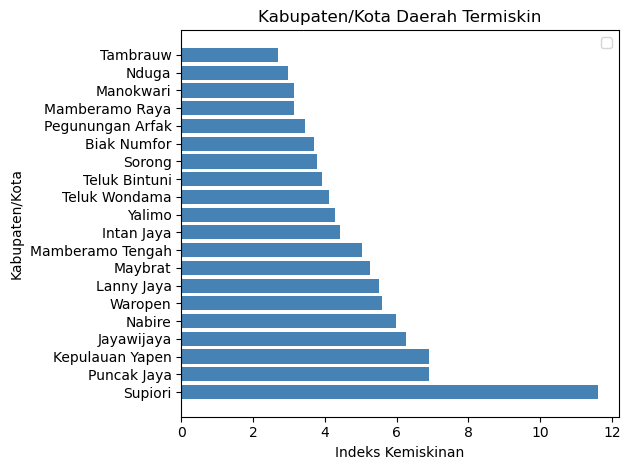

In [144]:
# Plotting
plt.barh(cluster_focus['kabupaten/kota'], cluster_focus['indeks kemiskinan gabungan'], color='steelblue')
plt.title('Kabupaten/Kota Daerah Termiskin')
plt.ylabel('Kabupaten/Kota')
plt.xlabel('Indeks Kemiskinan')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [148]:
prov = df[df['clusters'] == 0].sort_values(by='indeks kemiskinan gabungan' , ascending=False)
prov

,no,kabupaten/kota,provinsi,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,...,bekerja di sektor formal,bekerja di sektor pertanian,bekerja bukan di sektor pertanian,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,pkp untuk makanan miskin dan tidak miskin,air layak,jamban sendiri/bersama,clusters,indeks kemiskinan gabungan
491,492,Supiori,Papua,9470,42.56,12.241,4.955,618030,7.850000,46.66,...,11.57,18.83000,13.270,64.97,45.62,48.09,61.89,88.15,0,11.606915
505,506,Puncak Jaya,Papua Tengah,48850,35.46,8.369,2.955,933545,28.860000,48.14,...,14.06,76.41000,25.195,66.86,65.88,66.07,92.98,25.01,0,6.899935
486,487,Kepulauan Yapen,Papua,28700,28.00,8.020,3.069,821782,18.050000,50.88,...,3.96,43.33000,10.730,60.47,50.16,51.28,78.08,86.10,0,6.892836
507,508,Jayawijaya,Papua Pegunungan,61640,29.08,7.733,2.720,913719,47.120000,36.65,...,3.80,82.54000,3.870,69.25,58.25,59.42,44.92,77.60,0,6.262681
501,502,Nabire,Papua Tengah,34180,22.65,6.725,2.854,884601,17.360000,50.21,...,16.17,33.08000,27.710,57.54,46.45,47.47,93.74,72.00,0,5.968981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,Halmahera Selatan,Maluku Utara,11780,4.81,0.246,0.023,512217,19.120000,42.22,...,17.22,23.74000,34.270,55.34,57.47,57.42,71.01,88.02,0,-1.187519
470,471,Kota Ternate,Maluku Utara,8510,3.34,0.225,0.023,753052,19.296250,49.63,...,11.60,24.53625,38.130,57.16,43.68,43.80,100.00,100.00,0,-1.198298
365,366,Malinau,Kalimantan Utara,5240,5.56,0.248,0.014,821188,22.165000,59.23,...,10.32,49.91000,12.240,56.08,50.54,50.70,79.25,100.00,0,-1.201073
350,351,Tabalong,Kalimantan Selatan,12500,4.67,0.221,0.018,646864,27.650909,66.36,...,21.17,55.34000,15.740,58.08,49.44,49.59,78.47,95.97,0,-1.206427


In [315]:
# Hitung kemiskinan rata-rata klaster termiskin
cluster_focus_prov = prov.groupby('provinsi')[['indeks kemiskinan gabungan']].mean().reset_index()
vis_prov = cluster_focus_prov.sort_values(by='indeks kemiskinan gabungan', ascending=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


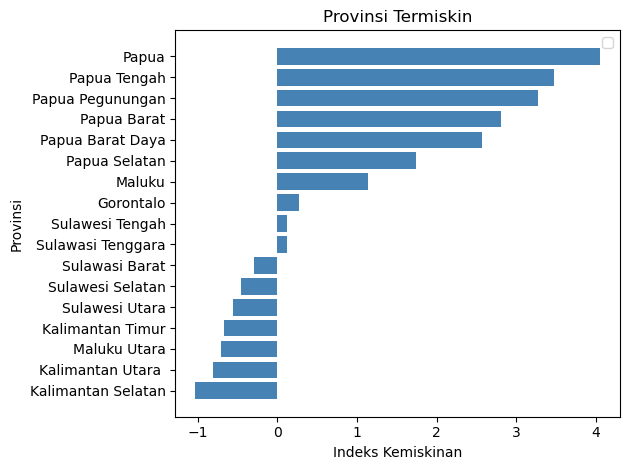

In [317]:
# Plotting
plt.barh(vis_prov['provinsi'], vis_prov['indeks kemiskinan gabungan'], color='steelblue')
plt.title('Provinsi Termiskin')
plt.ylabel('Provinsi')
plt.xlabel('Indeks Kemiskinan')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Modelling 
Membangun model machine learning untuk memprediksi variabel target. 

In [290]:
X = df_klaster.drop(columns=['k', 'clusters', 'indeks kemiskinan gabungan'])
y = df['persentase penduduk miskin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=100)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [291]:
y_pred = rf_model.predict(X_test)
print(f'Nilai Akusrasi: {metrics.r2_score(y_test, y_pred):.2f}')
print(f'Rata-rata error: {metrics.mean_absolute_error(y_test, y_pred):.2f}')

Nilai Akusrasi: 0.70
Rata-rata error: 3.10


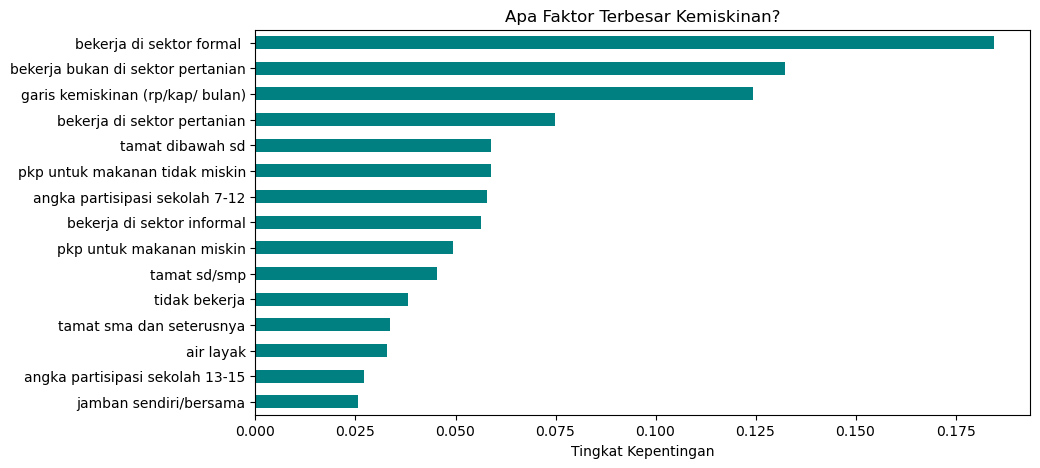

In [296]:
# Feature Importance 
plt.figure(figsize=(10, 5))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Apa Faktor Terbesar Kemiskinan?')
plt.xlabel('Tingkat Kepentingan')
plt.show()

In [313]:
# Prediksi perkota 
df['prediksi kemiskinan'] = rf_model.predict(X)
df['selisih error'] = df['persentase penduduk miskin'] - df['prediksi kemiskinan']

# Kota dengan selisih prediksi terbesar 
print('\n Kota dengan realita jauh lebih miskin dari prediksi')
df[['kabupaten/kota', 'provinsi', 'persentase penduduk miskin', 'prediksi kemiskinan', 'selisih error']].sort_values(by='selisih error', ascending=False).head(10)


 Kota dengan realita jauh lebih miskin dari prediksi


,kabupaten/kota,provinsi,persentase penduduk miskin,prediksi kemiskinan,selisih error
456,Seram Bagian Barat,Maluku,21.85,10.9419,10.9081
84,Kepulauan Meranti,Riau,20.51,9.8914,10.6186
491,Supiori,Papua,42.56,32.1820,10.3780
296,Timor Tengah Utara,Nusa Tenggara Timur,20.17,9.9315,10.2385
490,Waropen,Papua,32.60,23.5862,9.0138
222,Kulon Progo,DI Yogyakarta,14.53,5.8377,8.6923
496,Mappi,Papua Selatan,28.46,20.5234,7.9366
475,Teluk Bintuni,Papua Barat,25.34,17.6887,7.6513
304,Manggarai,Nusa Tenggara Timur,18.10,10.5578,7.5422
502,Paniai,Papua Tengah,36.31,28.7933,7.5167


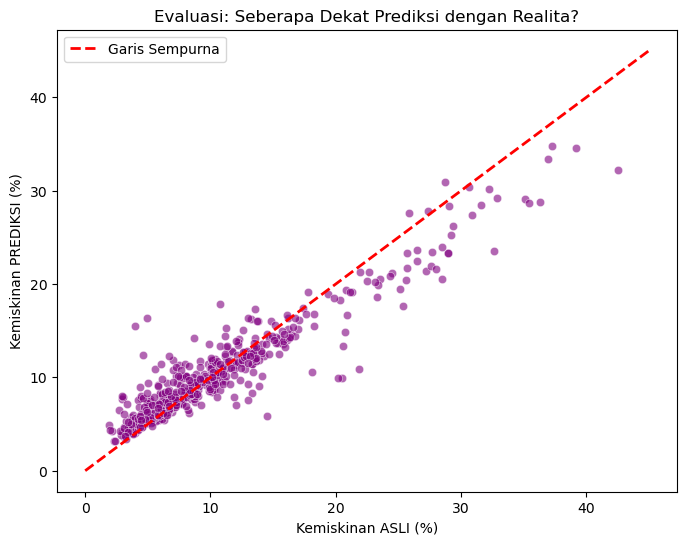

In [311]:
# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x='persentase penduduk miskin', y='prediksi kemiskinan', data=df, alpha=0.6, color='purple')
plt.plot([0, 45], [0, 45], 'r--', lw=2, label='Garis Sempurna') 
plt.xlabel('Kemiskinan ASLI (%)')
plt.ylabel('Kemiskinan PREDIKSI (%)')
plt.title('Evaluasi: Seberapa Dekat Prediksi dengan Realita?')
plt.legend()
plt.show()

In [325]:
kategori_cluster = {
    0 : 'Kabupaten/Kota Tertinggal',
    1 : 'Kabupaten/Kota Maju',
    2 : 'Kabupaten/Kota Berkembang'
}
df['kategori klaster'] = df['clusters'].map(kategori_cluster)
df

,no,kabupaten/kota,provinsi,jumlah penduduk miskin (000),persentase penduduk miskin,p1,p2,garis kemiskinan (rp/kap/ bulan),tamat dibawah sd,tamat sd/smp,...,pkp untuk makanan miskin,pkp untuk makanan tidak miskin,pkp untuk makanan miskin dan tidak miskin,air layak,jamban sendiri/bersama,clusters,indeks kemiskinan gabungan,prediksi kemiskinan,selisih error,kategori klaster
0,1,Simeulue,Aceh,15580,15.52,2.227,0.458,586505,2.550000,67.44,...,65.74,59.94,60.37,86.55,63.78,1,0.381135,14.2401,1.2799,Kota Maju
1,2,Aceh Singkil,Aceh,22510,17.07,3.237,0.913,619322,10.640000,57.02,...,66.66,57.17,57.96,77.64,81.93,1,1.517234,16.1551,0.9149,Kota Maju
2,3,Aceh Selatan,Aceh,25390,9.89,1.552,0.461,538174,6.770000,54.92,...,63.25,65.28,65.20,92.72,92.45,1,0.066608,13.5778,-3.6878,Kota Maju
3,4,Aceh Tenggara,Aceh,22520,9.78,1.036,0.162,502074,8.229286,47.42,...,62.33,62.09,62.10,83.55,77.79,1,-0.609277,11.3993,-1.6193,Kota Maju
4,5,Aceh Timur,Aceh,52230,11.24,1.021,0.151,564943,8.229286,64.76,...,65.98,60.37,60.67,82.67,89.89,1,-0.625079,11.5982,-0.3582,Kota Maju
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,510,Tolikara,Papua Pegunungan,45620,28.75,2.695,0.385,861729,77.580000,13.01,...,78.20,75.08,75.69,30.12,10.56,0,0.506154,30.9663,-2.2163,Kota Tertinggal
510,511,Mamberamo Tengah,Papua Pegunungan,18810,32.20,7.042,2.094,901904,34.740000,44.25,...,73.21,69.96,70.57,34.20,55.63,0,5.024020,30.1537,2.0463,Kota Tertinggal
511,512,Yalimo,Papua Pegunungan,19900,27.35,6.364,1.811,775882,59.425714,49.77,...,75.10,63.90,65.42,59.43,96.45,0,4.294991,27.8808,-0.5308,Kota Tertinggal
512,513,Yahukimo,Papua Pegunungan,62420,30.61,3.737,0.703,908562,57.700000,38.19,...,73.99,64.83,66.46,29.45,20.97,0,1.462986,30.4220,0.1880,Kota Tertinggal


# Save File
Menyimpan File terbaru untuk dilakukan visualisasi lanjutan menggunakan Tableau.

In [331]:
df.to_csv('Data Kemiskinan Indonesia 2025.csv', index=False)
print('File berhasil tersimpan')

File berhasil tersimpan
